# Spatial aggregation

>Statistical aggregating functions return a single value per grouping variable

>Find the average height of the nz_height points in each region

In [2]:
import geopandas as gpd 
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt
from helpers import nz_height, nz

In [3]:
nz_height_2 = gpd.sjoin(
    nz_height[['elevation', 'geometry']], 
    nz[['Name', 'geometry']], 
    how='left'
)
print(nz_height_2)

     elevation                         geometry  index_right               Name
0         2723  POINT (1204142.603 5049971.287)           12          Southland
1         2820  POINT (1234725.325 5048309.302)           11              Otago
2         2830  POINT (1235914.511 5048745.117)           11              Otago
3         3033  POINT (1259701.635 5076570.049)            9         West Coast
4         2749    POINT (1378169.6 5158491.453)           10         Canterbury
..         ...                              ...          ...                ...
96        2797   POINT (1821014.19 5647970.666)            7  Manawatu-Wanganui
97        2757  POINT (1820642.909 5648331.194)            7  Manawatu-Wanganui
98        2751  POINT (1820659.873 5649488.235)            2            Waikato
99        2720  POINT (1822262.592 5650428.656)            2            Waikato
100       2732  POINT (1822492.184 5650492.304)            2            Waikato

[101 rows x 4 columns]


In [4]:
nz_height_2 = (nz_height_2.groupby('Name')[['elevation']]
                .mean().reset_index())
print(nz_height_2)

                Name    elevation
0         Canterbury  2994.600000
1  Manawatu-Wanganui  2777.000000
2        Marlborough  2720.000000
3              Otago  2825.000000
4          Southland  2723.000000
5            Waikato  2734.333333
6         West Coast  2889.454545


In [5]:
nz2 = pd.merge(nz[['Name', 'geometry']], 
              nz_height_2, on='Name', how='left')
print(nz2)

                 Name  ...    elevation
0           Northland  ...          NaN
1            Auckland  ...          NaN
2             Waikato  ...  2734.333333
3       Bay of Plenty  ...          NaN
4            Gisborne  ...          NaN
5         Hawke's Bay  ...          NaN
6            Taranaki  ...          NaN
7   Manawatu-Wanganui  ...  2777.000000
8          Wellington  ...          NaN
9          West Coast  ...  2889.454545
10         Canterbury  ...  2994.600000
11              Otago  ...  2825.000000
12          Southland  ...  2723.000000
13             Tasman  ...          NaN
14             Nelson  ...          NaN
15        Marlborough  ...  2720.000000

[16 rows x 3 columns]


>Normally the ones with NaN would not display. The missing_kwds argument is used so that they do.

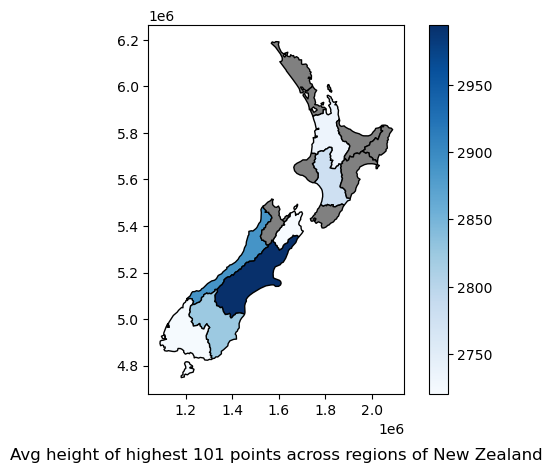

In [22]:
ax = nz2.plot(
    column='elevation', 
    legend=True, 
    cmap='Blues', edgecolor='k', 
    missing_kwds={'color': 'grey', 'edgecolor': 'k'},
)
ax.set_title("Avg height of highest 101 points across regions of New Zealand", 
            y=-.2);